In [30]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
import numpy as np

In [11]:
# Exemplo usando OpenCV
# Carregar imagem usando OpenCV
imagem_opencv = cv2.imread('imagem.jpg')

# Exemplo Usando PIL
# Carregar imagem usando PIL
imagem_pil = Image.open('imagem.jpg')

print(imagem_opencv)


[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 ...

 [[212 229 239]
  [212 229 239]
  [212 229 239]
  ...
  [141 179 210]
  [140 178 209]
  [135 174 205]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [144 182 213]
  [142 180 211]
  [137 176 207]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [141 179 210]
  [140 178 209]
  [137 176 207]]]


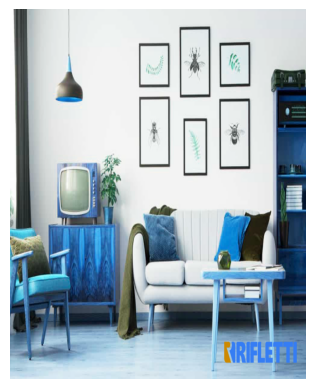

In [7]:
# Redimensionar a imagem usando OpenCV
imagem_redimensionada_opencv = cv2.resize(imagem_opencv, (800, 1000))

print(imagem_opencv)
plt.imshow(imagem_redimensionada_opencv)
plt.axis('off')
plt.show()

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1365x910 at 0x19E7BEB9460>


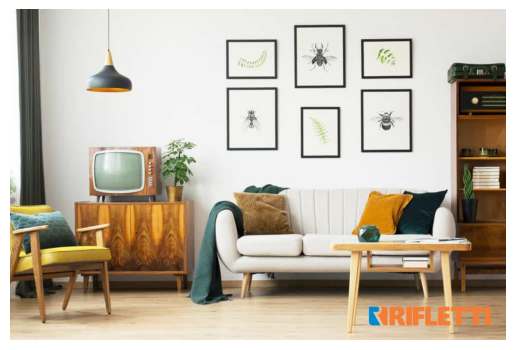

In [8]:
print(imagem_pil)
plt.imshow(imagem_pil)
plt.axis('off')
plt.show()

In [9]:
# Converter a imagem para outro formato usando OpenCV
cv2.imwrite('imagem_conversao.jpg', imagem_opencv)

# Converter a imagem para outro formato usando PIL
imagem_pil.save('imagem_conversao.png', format='PNG')


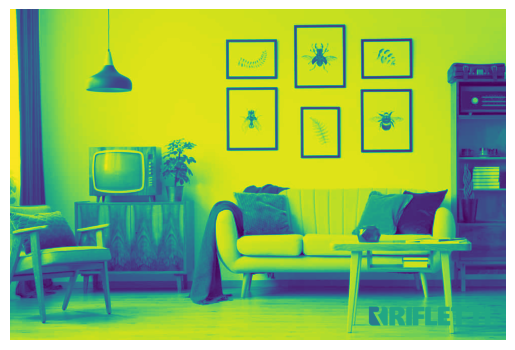

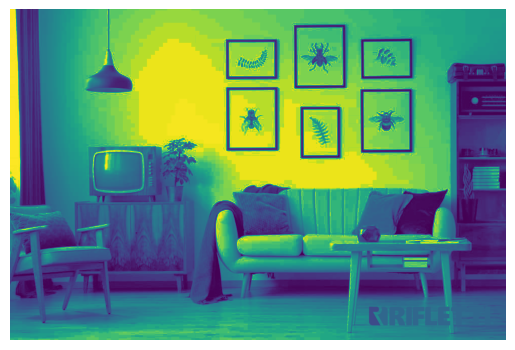

In [10]:
# Carregar a imagem em escala de cinza
imagem = cv2.imread('imagem.jpg', cv2.IMREAD_GRAYSCALE)

# Equalizar o histograma da imagem
imagem_equalizada = cv2.equalizeHist(imagem)

plt.imshow(imagem)
plt.axis('off')
plt.show()

plt.imshow(imagem_equalizada)
plt.axis('off')
plt.show()

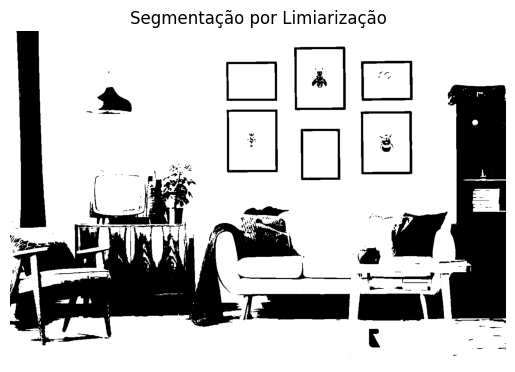

In [12]:
# Carregar a imagem
imagem = cv2.imread('imagem.png', cv2.IMREAD_GRAYSCALE)

# Aplicar limiarização
_, imagem_segmentada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)
# Aplicar limiarização para segmentar a imagem em preto e branco
# 127 é o valor de limiar, pixels abaixo deste valor serão definidos como preto (0), e acima como branco (255)

# Mostrar a imagem segmentada
plt.imshow(imagem_segmentada, cmap='gray')
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()

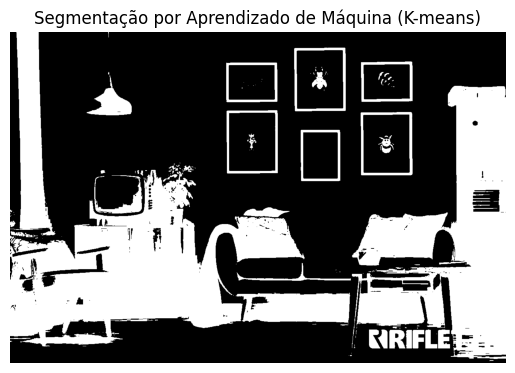

In [41]:
imagem = cv2.imread('imagem.png')

# Exemplo de Segmentação Baseada em Aprendizado de Máquina:
# Este código demonstra um exemplo de segmentação de imagem usando o algoritmo K-means.

# Instale a biblioteca scikit-learn se ainda não estiver instalada
# py -m pip install -U scikit-learn

# Converter imagem para um vetor 1D
# A imagem é convertida em um array 1D para facilitar a aplicação do algoritmo K-means
imagem_reshaped = imagem.reshape((-1, 3))  # Reshape para um vetor de características (cada linha representa um pixel)

# Aplicar K-means para segmentação
# O algoritmo K-means é aplicado para agrupar os pixels da imagem em clusters
# n_clusters=2 indica que queremos dividir a imagem em 2 clusters (por exemplo, objetos e fundo)
kmeans = KMeans(n_clusters=2)  # Cria uma instância do algoritmo K-means com 2 clusters
kmeans.fit(imagem_reshaped)  # Aplica o K-means aos dados da imagem
clusters = kmeans.predict(imagem_reshaped)  # Prevê o cluster de cada pixel na imagem

# Remontar a imagem segmentada
# A imagem segmentada é reconstruída usando os clusters previstos
# A forma da imagem resultante é a mesma da imagem original
imagem_segmentada = clusters.reshape(imagem.shape[:2])  # Reshape para a forma da imagem original

# Mostrar a imagem segmentada
# A imagem segmentada é exibida em escala de cinza
plt.imshow(imagem_segmentada, cmap='gray')  # Exibe a imagem segmentada
plt.axis('off')  # Desativa os eixos
plt.title('Segmentação por Aprendizado de Máquina (K-means)')  # Adiciona um título à imagem
plt.show()  # Mostra a imagem segmentada

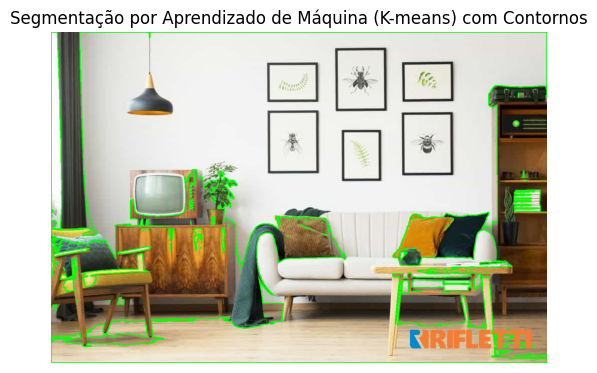

In [40]:
imagem = cv2.imread('imagem.png')

# Converter imagem para um vetor 1D
imagem_reshaped = imagem.reshape((-1, 3))

# Aplicar K-means para segmentação
kmeans = KMeans(n_clusters=2)
kmeans.fit(imagem_reshaped)
clusters = kmeans.predict(imagem_reshaped)

# Remontar a imagem segmentada
imagem_segmentada = clusters.reshape(imagem.shape[:2])

# Encontrar contornos na imagem segmentada
contornos, _ = cv2.findContours(imagem_segmentada.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem original para desenhar os contornos
imagem_com_contornos = imagem.copy()

# Desenhar os contornos na imagem original
cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
plt.imshow(cv2.cvtColor(imagem_com_contornos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Segmentação por Aprendizado de Máquina (K-means) com Contornos')
plt.show()

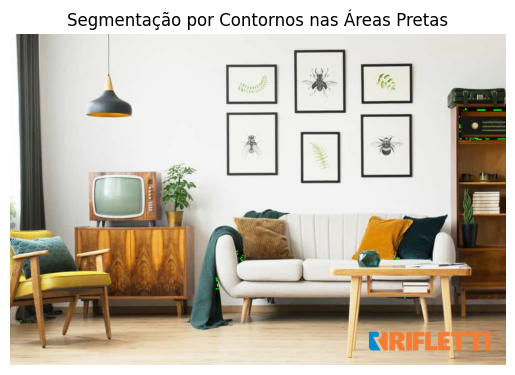

In [42]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar uma limiarização para segmentar os pixels pretos
_, imagem_binaria = cv2.threshold(imagem_gray, 1, 255, cv2.THRESH_BINARY_INV)

# Encontrar contornos na imagem binária
contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem original para desenhar os contornos
imagem_com_contornos = imagem.copy()

# Desenhar os contornos na imagem original apenas nas áreas pretas
cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
plt.imshow(cv2.cvtColor(imagem_com_contornos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Segmentação por Contornos nas Áreas Pretas')
plt.show()

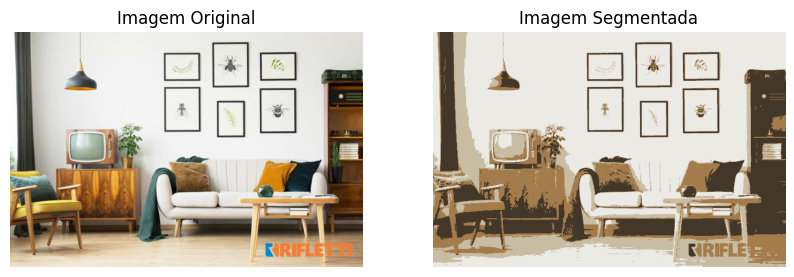

In [43]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converter para o formato RGB

# Redimensionar a imagem para facilitar o processamento
altura, largura = imagem.shape[:2]
imagem_redimensionada = cv2.resize(imagem, (largura // 2, altura // 2))

# Preparar os dados para o K-means
dados = imagem_redimensionada.reshape((-1, 3))

# Aplicar K-means para segmentação
kmeans = KMeans(n_clusters=4)  # Definir o número de clusters
kmeans.fit(dados)
segmentos = kmeans.labels_
centroides = kmeans.cluster_centers_

# Remontar a imagem segmentada
imagem_segmentada = np.zeros_like(dados)
for i, cor in enumerate(centroides):
    imagem_segmentada[segmentos == i] = cor
imagem_segmentada = imagem_segmentada.reshape(imagem_redimensionada.shape)

# Mostrar a imagem original e a imagem segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_redimensionada)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_segmentada)
plt.title('Imagem Segmentada')
plt.axis('off')

plt.show()


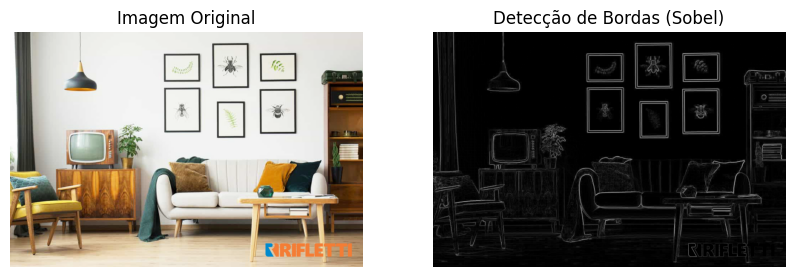

In [44]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar o operador Sobel para detectar bordas na imagem
# Sobel é um operador de detecção de bordas que enfatiza as mudanças de intensidade nas direções horizontal e vertical
# cv2.CV_64F é o tipo de dados de saída que é um número de ponto flutuante de 64 bits
# 1 indica a ordem da derivada em relação à direção x (horizontal), 0 para a direção y (vertical)
# ksize é o tamanho do kernel usado para a operação de convolução, aqui definido como 3 para uma detecção de bordas mais precisa
bordas_x = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)  # Detecta bordas na direção x (horizontal)
bordas_y = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)  # Detecta bordas na direção y (vertical)

# Calcular a magnitude das bordas
# A magnitude é calculada combinando as derivadas horizontais e verticais usando a função cv2.magnitude()
magnitude_bordas = cv2.magnitude(bordas_x, bordas_y)

# Normalizar os valores para o intervalo [0, 255]
# A normalização é feita para que os valores da imagem estejam dentro da faixa de 0 a 255 para exibição
# Isso é necessário porque os valores de magnitude podem ser negativos ou maiores que 255 após a operação de Sobel
magnitude_bordas = cv2.normalize(magnitude_bordas, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Mostrar a imagem original e as bordas detectadas
plt.figure(figsize=(10, 5))

# Subplot 1: Imagem Original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  # Convertendo a imagem de BGR para RGB para exibição correta
plt.title('Imagem Original')  # Título do subplot
plt.axis('off')  # Desativar eixos

# Subplot 2: Imagem das Bordas Detectadas (Sobel)
plt.subplot(1, 2, 2)
plt.imshow(magnitude_bordas, cmap='gray')  # Exibe a imagem em escala de cinza
plt.title('Detecção de Bordas (Sobel)')  # Título do subplot
plt.axis('off')  # Desativar eixos

plt.show()  # Mostra os subplots

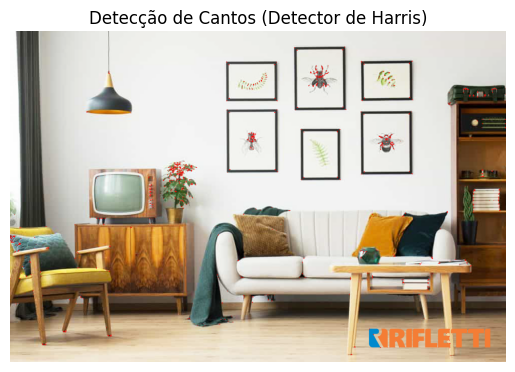

In [45]:
# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar pontos de interesse usando o detector de Harris
# O detector de Harris é usado para identificar cantos ou pontos de interesse na imagem
# O parâmetro "ksize" especifica o tamanho da janela de sobel usada para calcular a derivada do gradiente da imagem
# O parâmetro "k" é um parâmetro de livre escolha na função de resposta do detector de Harris
cantos = cv2.cornerHarris(imagem_gray, 2, 3, 0.04)

# Destacar os pontos de interesse na imagem original
# A linha acima destaca os cantos em vermelho na imagem original se a intensidade do canto for maior que 1% do máximo
imagem[cantos > 0.01 * cantos.max()] = [0, 0, 255]  # Destacar os cantos em vermelho

# Mostrar a imagem com os cantos detectados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  # Converter a imagem de BGR para RGB para exibição correta
plt.title('Detecção de Cantos (Detector de Harris)')  # Título da imagem
plt.axis('off')  # Desativar os eixos
plt.show()  # Mostrar a imagem

In [46]:
# Carregar a imagem
imagem = cv2.imread('formas.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar uma limiarização para segmentar as formas
_, imagem_binaria = cv2.threshold(imagem_gray, 240, 255, cv2.THRESH_BINARY)

# Encontrar contornos na imagem binária
contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem original para desenhar os contornos
imagem_com_contornos = imagem.copy()

# Desenhar os contornos na imagem original
cv2.drawContours(imagem_com_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com os contornos das formas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagem_com_contornos, cv2.COLOR_BGR2RGB))
plt.title('Contornos das Formas')
plt.axis('off')

plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


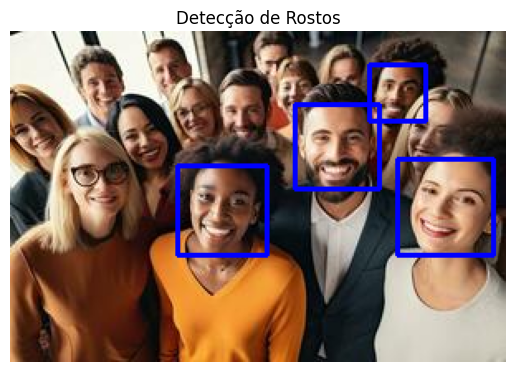

In [48]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('image.jpg')

# Carregar o classificador de detecção de faces pré-treinado
classificador_faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Converter a imagem para escala de cinza (necessário para detecção de objetos)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar rostos na imagem
faces = classificador_faces.detectMultiScale(imagem_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor dos rostos detectados
for (x, y, w, h) in faces:
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Exibir a imagem com os rostos detectados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Detecção de Rostos')
plt.axis('off')
plt.show()